###ReLU :
The ReLU activation function replaces negative input values with zero while leaving positive values unchanged which introduces non-linearity and aids in avoiding vanishing gradient problems during neural network training.

ReLU is defined as follows:

ReLU(x)=max(0,x)

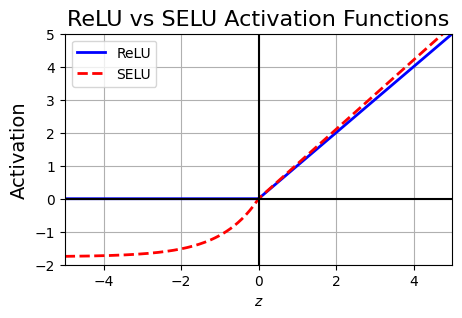

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# SELU function
def selu(x, scale=1.0507, alpha=1.67326):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Generate input values
z = np.linspace(-5, 5, 200)

# Compute ReLU and SELU outputs
relu_output = relu(z)
selu_output = selu(z)

# Set smaller figure size
plt.figure(figsize=(5, 3))

# Plot ReLU and SELU functions
plt.plot(z, relu_output, "b-", linewidth=2, label="ReLU")
plt.plot(z, selu_output, "r--", linewidth=2, label="SELU")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-2, 5], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2, 5])
plt.xlabel("$z$")
plt.ylabel("Activation", fontsize=14)
plt.title("ReLU vs SELU Activation Functions", fontsize=16)
plt.legend()
plt.show()


Creating a neural net for Fashion MNIST with 100 hidden layers, using the ReLU activation function :

In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])


history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1719/1719 [==============================] - 45s 21ms/step - loss: 1.9044 - accuracy: 0.2536 - val_loss: 1.6395 - val_accuracy: 0.3720
Epoch 2/5
1719/1719 [==============================] - 38s 22ms/step - loss: 1.3300 - accuracy: 0.4447 - val_loss: 1.5411 - val_accuracy: 0.3416
Epoch 3/5
1719/1719 [==============================] - 35s 20ms/step - loss: 1.0270 - accuracy: 0.5749 - val_loss: 0.9392 - val_accuracy: 0.6226
Epoch 4/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.9750 - accuracy: 0.6028 - val_loss: 1.0616 - val_accuracy: 0.5622
Epoch 5/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.9864 - accuracy: 0.6092 - val_loss: 0.9348 - val_accuracy: 0.6466
